In [107]:
# OR gate problem

### Data

In [108]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [109]:
dataset_size = 400
train_size = int(dataset_size * 0.5)
test_size = int(dataset_size * 0.5)

In [110]:
x = np.random.normal(0, 0.5, size=(dataset_size, 2))*100
# x

In [111]:
y = np.ones(dataset_size)
# y

In [112]:
y[ x[:,0] * x[:,1] <= 0 ] = 0 
# y

In [113]:
y_train = torch.tensor(y[:train_size], dtype = torch.float32)
x_train = torch.tensor(x[:train_size,:], dtype = torch.float32)

y_valid = torch.tensor(y[train_size:], dtype = torch.float32)
x_valid = torch.tensor(x[train_size:,:], dtype = torch.float32)

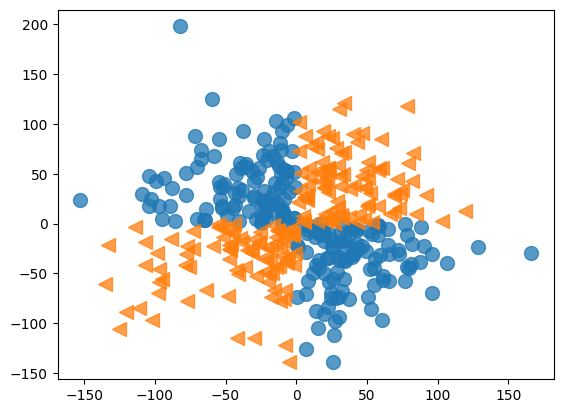

In [114]:
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)

In [115]:
td_train = TensorDataset( x_train, y_train ) 

In [116]:
batch_size = 2
dl_train = DataLoader( dataset=td_train, batch_size=batch_size, shuffle=True )

## nn.Sequential()

In [117]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Softmax()
)

In [118]:
loss_f = nn.BCELoss()
optim  = torch.optim.SGD( lr=0.001, params=model.parameters() ) 

In [119]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_f(pred, y_batch)
            loss.backward()
            optim.step()
            optim.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= train_size/batch_size
        accuracy_hist_train[epoch] /= train_size/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_f(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [120]:
history = train(model, 100, dl_train, x_valid, y_valid )

Z:\python\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Text(0.5, 0, 'Epochs')

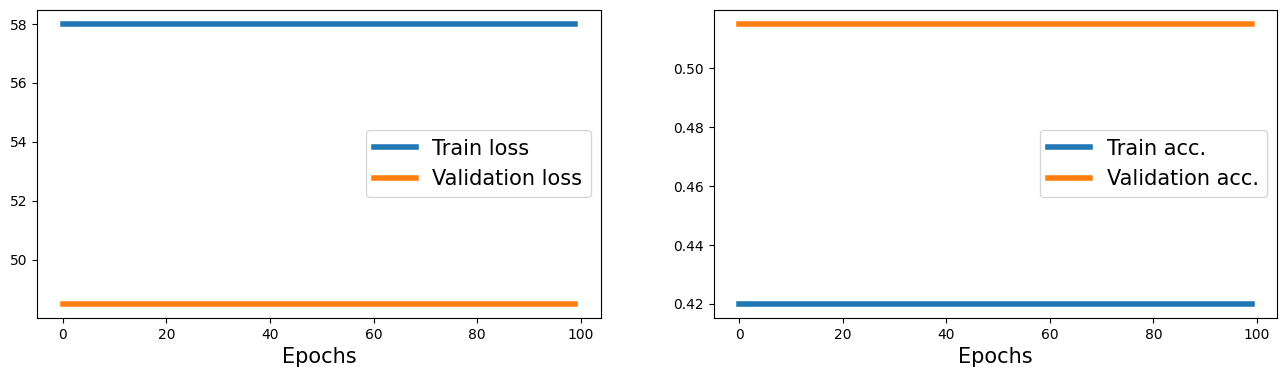

In [121]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

In [122]:
'''
    At this stage we can see how a linear relationship is not enough to model
    an XOR gate. We can increase either the number of Units and make the nn
    wider or we could increase the number of layers and make it deeper.
    Each has its own consequenses.

    With deeper models, fewer parameters are required to match the capacity
    of an nn with more Units. However, by making the nn deeper, there is
    a high risk of vanishing or overshooting gradients.
'''

'\n    At this stage we can see how a linear relationship is not enough to model\n    an XOR gate. We can increase either the number of Units and make the nn\n    wider or we could increase the number of layers and make it deeper.\n    Each has its own consequenses.\n\n    With deeper models, fewer parameters are required to match the capacity\n    of an nn with more Units. However, by making the nn deeper, there is\n    a high risk of vanishing or overshooting gradients.\n'

In [123]:
model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)

loss_f = nn.BCELoss()
optim  = torch.optim.SGD( lr=0.001, params=model.parameters() )

In [124]:
history = train(model, 100, dl_train, x_valid, y_valid )

Text(0.5, 0, 'Epochs')

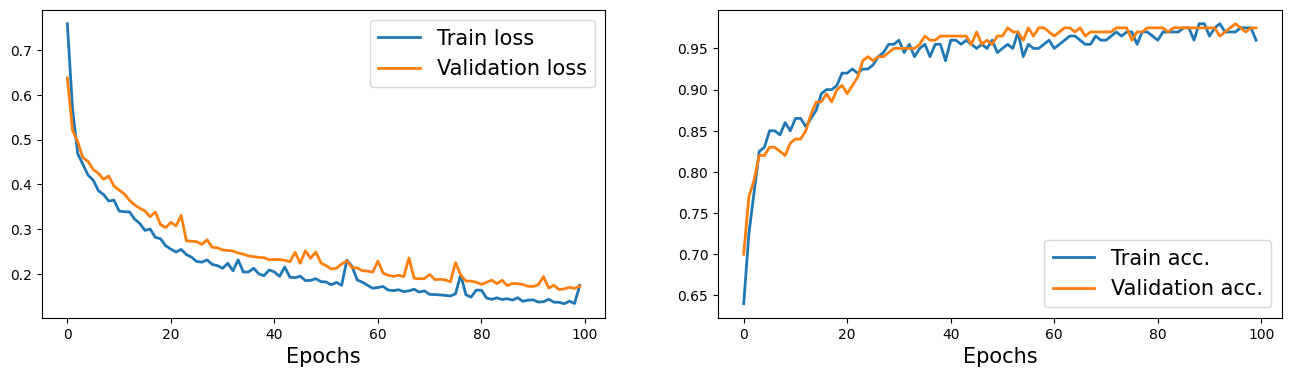

In [125]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=2)
plt.plot(history[1], lw=2)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=2)
plt.plot(history[3], lw=2)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

## nn.Module()

In [ ]:
'''
    Since nn.Sequential() does not give us the flexibility of having
    branches || multiple input/output, it is not appropriate for 
    creating more complex models.
'''

In [137]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.module_list = nn.ModuleList([
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        ])

    def forward(self, x):
        for layer in self.module_list:
            x = layer(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()
            
model = MyModule()
print(model)

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [138]:
hist = train(model, 100, dl_train, x_valid, y_valid) 

In [139]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 0, 'Epochs')

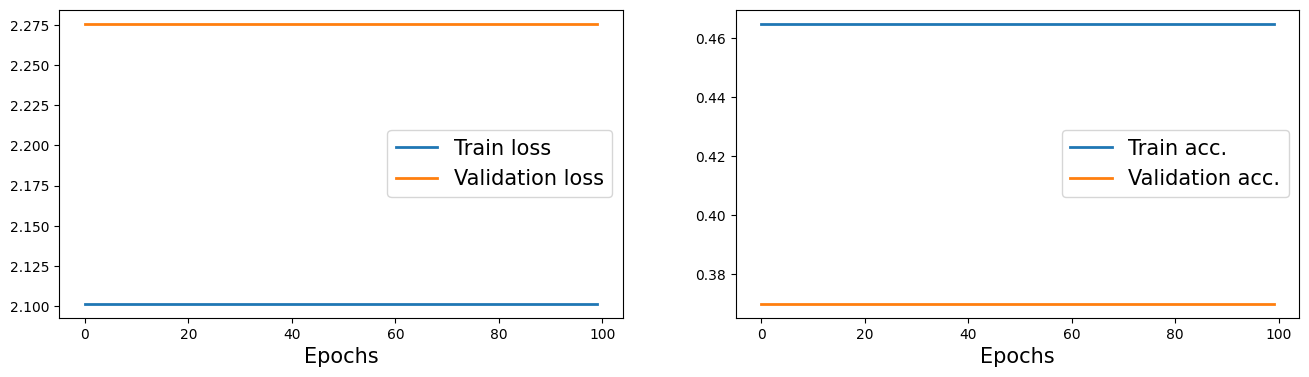

In [140]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(hist[0], lw=2)
plt.plot(hist[1], lw=2)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(hist[2], lw=2)
plt.plot(hist[3], lw=2)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

<Axes: >

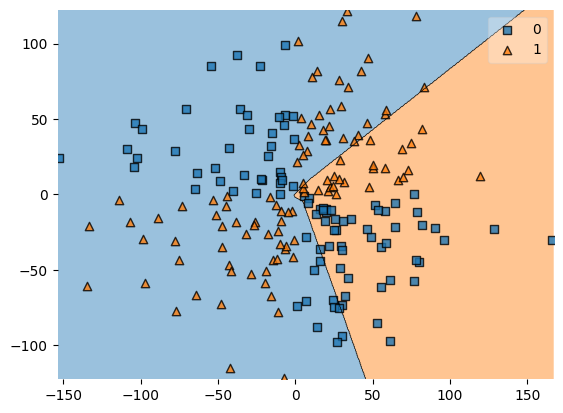

In [141]:
plot_decision_regions( X=x_valid.numpy(), y=y_valid.numpy().astype(np.int64), clf = model )

## Custom Layers

In [ ]:
class NoisyLinear( nn.Module ):
    def __init__( self, x, input_size, output_size ):
        